Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Mohammad Shadik Ansari | 12340306 | 05.02.2024, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 7 &ndash; Tricks of the Trade</h2>

<b>Authors:</b> Schlüter, Rumetshofer, Schörgenhumer<br>
<b>Date:</b> 22-01-2024

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u7_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u7_utils.py</code> need to be installed.

In [2]:
# Required packages and the u7_utils file
import u7_utils as u7
from pathlib import Path
import torch

<h2>Exercise 1</h2>

<div class="alert alert-warning">
    <b>Exercise 1.1. [5 Points]</b>
    <ul>
        <li>In this notebook, you will be working with the provided datatset <code>resources/burgers_and_buritos</code>.</li>
        <li>Specify the path and download the images of this dataset.</li>
        <li>Load the dataset, reserving 20% for validation and enabling data augmentation.</li>
    </ul>
</div>

In [85]:
dataset_name = "burgers_and_burritos"
dataset_path = Path(f"resources/{dataset_name}")
dataset_path.mkdir(parents=True, exist_ok=True)
u7.download_all_images(dataset_path)
dataset = u7.load_image_dataset(
    dataset_path,
    valid_size=0.2,  # keep 20% for validation
    batch_size=32,   # reduce if you run out of RAM
    augment=True     # whether to use augmentation
)

ignored 2 'burgers' images due to previous download failure
ignored 308 'burgers' images because they already exist


ignored 3 'burritos' images due to previous download failure
ignored 318 'burritos' images because they already exist


<div class="alert alert-warning">
    <b>Exercise 1.2. [5 Points]</b>
    <ul>
        <li>Plot 8 example images in 2 rows.</li>
    </ul>
</div>

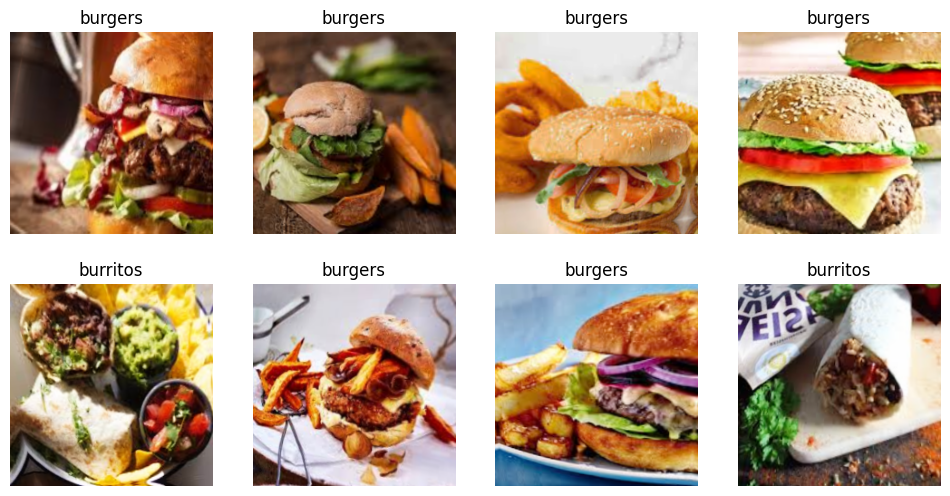

In [86]:
u7.set_seed(100)
dataset.show_batch(
    max_n=8, nrows=2,  # how many images to show in how many rows
    unique=False       # set to True to see effect of augmentation
)

<h2>Exercise 2</h2>

<div class="alert alert-warning">
    <b>Exercise 2.1. [5 Points]</b>
    <ul>
        <li>Using <code>u7.create_cnn()</code>, create a <b>pretrained</b> CNN with 18 layers and the number of classes set according to your dataset (the other settings do not matter).</li>
        <li>Store the model in a variable called <code>model</code>.</li>
    </ul>
</div>

In [87]:
u7.set_seed(100)
model = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=True,   # whether to use batch normalization
    dropout=0.3,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=False,   # whether to use residual connections
    pretrained=False   # whether to use pretrained weights
)
loss = torch.nn.functional.cross_entropy

<div class="alert alert-warning">
    <b>Important:</b> Plot the weights of the first layer (already done, only need to execute the cell).
</div>

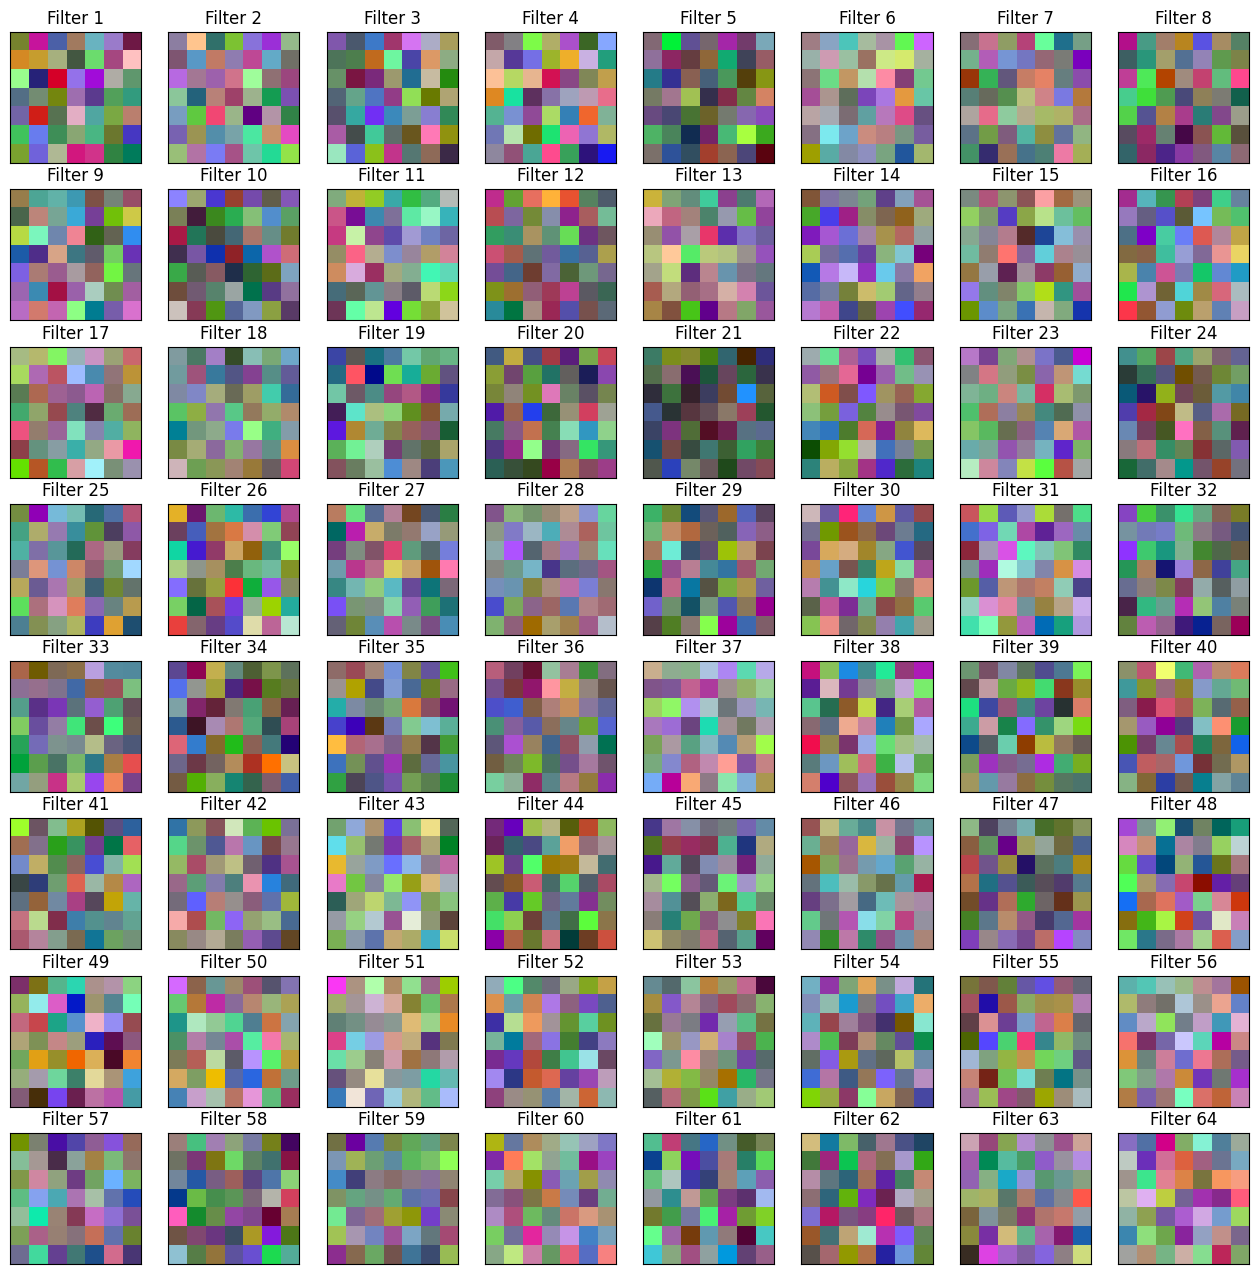

In [88]:
u7.set_seed(100)
weights = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

<h2>Exercise 3</h2>

Using the dataset that you loaded in Exercise 1, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Create a CNN with 18 layers, no dropout, no batch normalization, no residuals, and no pretraining, using <code>u7.create_cnn()</code>.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.create_cnn()</code>.</li>
    </ul>
</div>

In [89]:
u7.set_seed(100)
model = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=False,   # whether to use batch normalization
    dropout=0,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=False,   # whether to use residual connections
    pretrained=False   # whether to use pretrained weights
)

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer and store them in a variable called <code>weights_before_training</code>.</li>
    </ul>
</div>

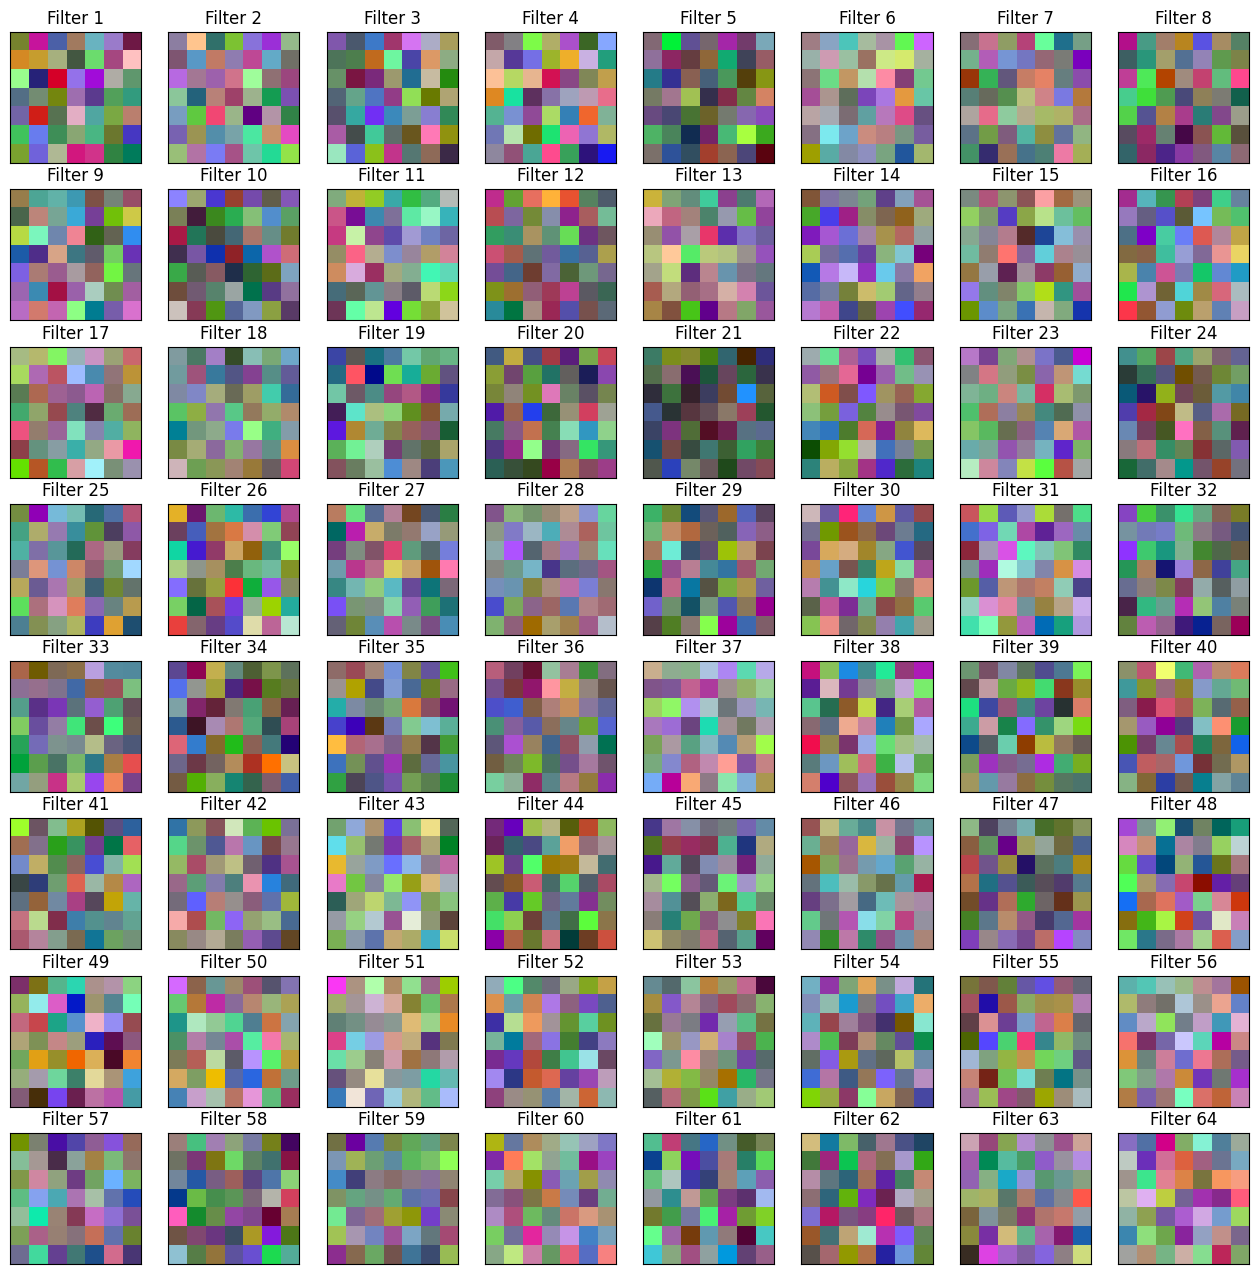

In [90]:
u7.set_seed(100)
weights_before_training = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 3.3. [5 Points]</b>
    <ul>
        <li>Train the model for 5 iterations/epochs, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using <code>u7.run_gradient_descent()</code>.</li>
        <li>Hint: You may omit the validation set to speed up the computation, as it is not needed.</li>
    </ul>
</div>

In [95]:
u7.set_seed(100)
u7.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=5,         # number of epochs
    learning_rate=0.005,  # base learning rate
    momentum=0.9,         # base momentum
    lr_schedule=None,     # try "linear", "onecycle", "steps"
    plot_curves=False
);

  0%|          | 0/501 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.629470 and validation loss: 0.680210
Epoch  2 finished with training loss: 0.616483 and validation loss: 0.673428
Epoch  3 finished with training loss: 0.645052 and validation loss: 0.671110
Epoch  4 finished with training loss: 0.614159 and validation loss: 0.671344
Epoch  5 finished with training loss: 0.563532 and validation loss: 0.657434


<div class="alert alert-warning">
    <b>Exercise 3.4. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer again and store them in a variable called <code>weights_after_training</code>.</li>
    </ul>
</div>

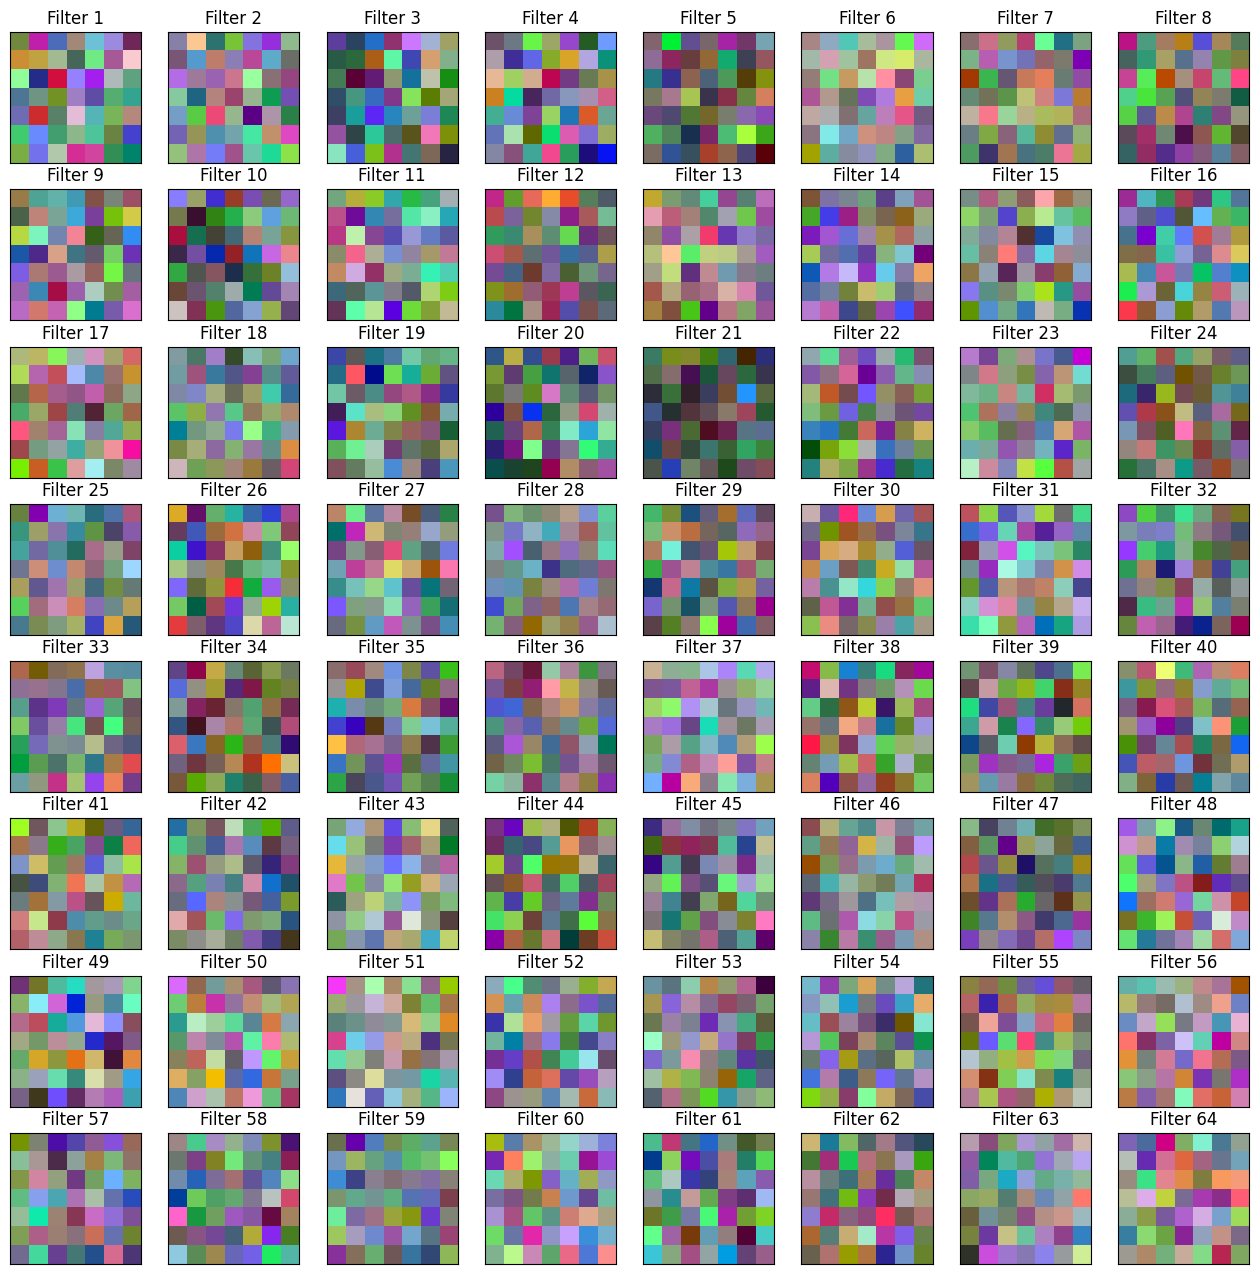

In [96]:
u7.set_seed(100)
weights_after_training = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 3.5. [5 Points]</b>
    <ul>
        <li>Compare the filters plotted before and after training. Do you see any difference? Did the filters change visibly during training?</li>
    </ul>
</div>

To be honest, maybe i did something wrond but i cannot see any changes so far.

<div class="alert alert-warning">
    <b>Important:</b> Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.
</div>

In [94]:
u7.set_seed(100)
(weights_before_training - weights_after_training).abs().sum().item()

13.583076477050781

<h2>Exercise 4</h2>

Similar to before, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Create a CNN with 18 layers, no dropout, <b>with</b> batch normalization, <b>with</b> residuals, and no pretraining, using <code>u7.create_cnn()</code>.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.create_cnn()</code>.</li>
    </ul>
</div>

In [97]:
u7.set_seed(100)
model = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=True,   # whether to use batch normalization
    dropout=0,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=True,   # whether to use residual connections
    pretrained=False   # whether to use pretrained weights
)
loss = torch.nn.functional.cross_entropy


<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer and store them in a variable called <code>weights_before_training</code>.</li>
    </ul>
</div>

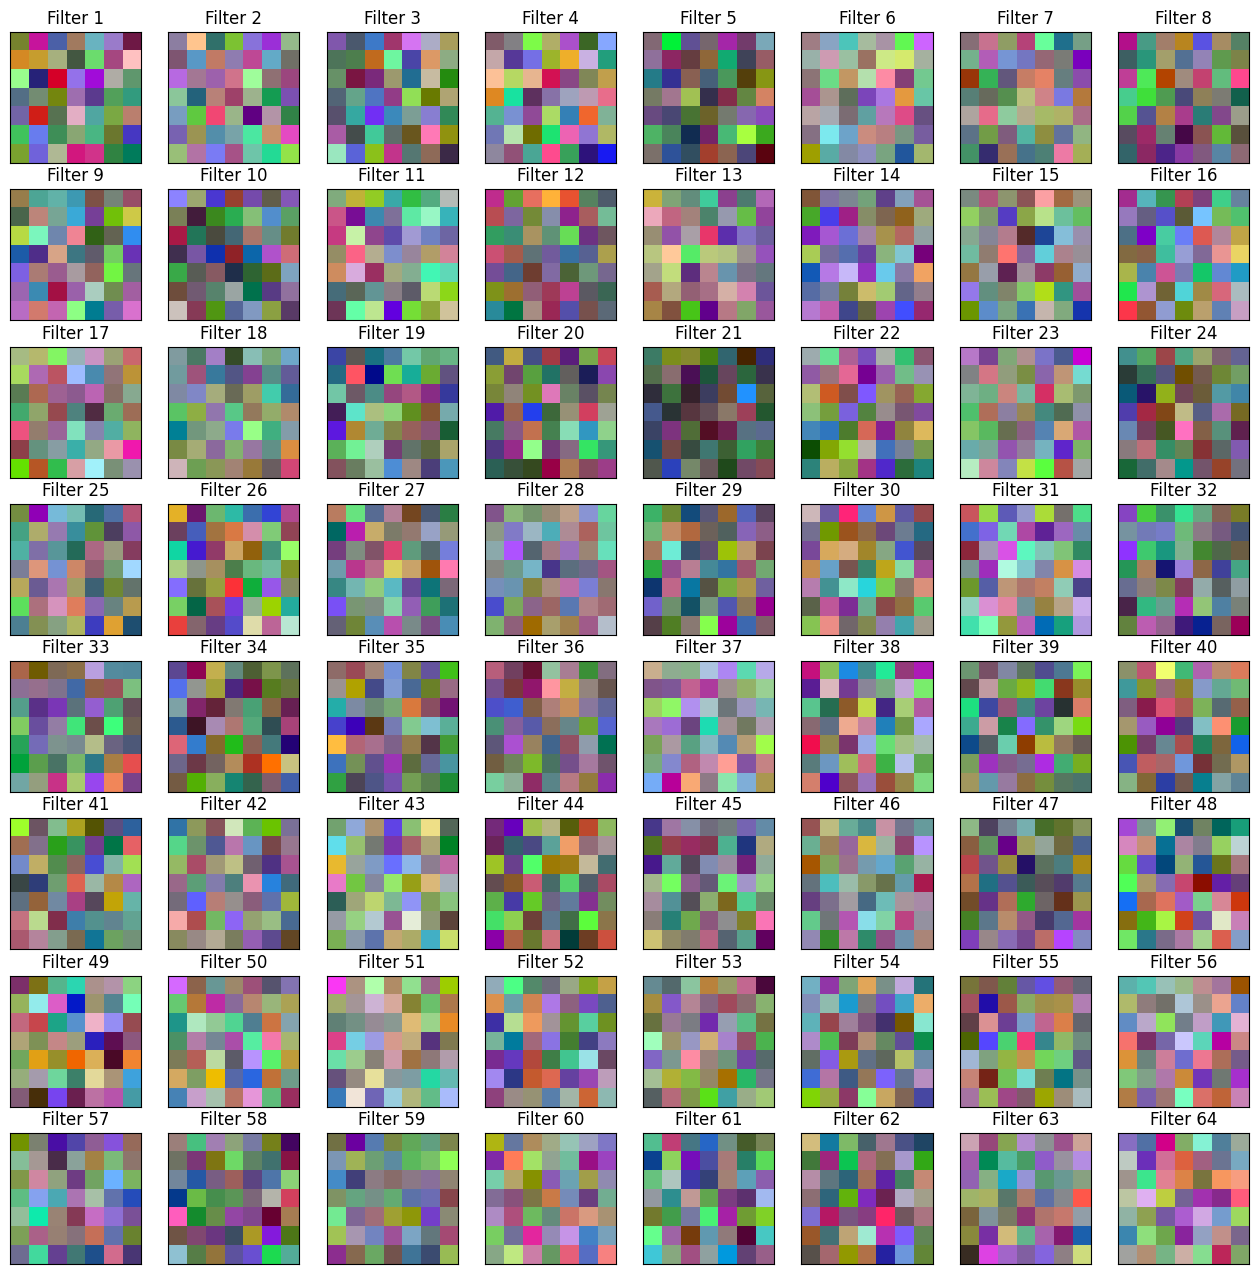

In [98]:
u7.set_seed(100)
weights_before_training = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 4.3. [5 Points]</b>
    <ul>
        <li>Train the model for 5 iterations, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using <code>u7.run_gradient_descent()</code>.</li>
        <li>Hint: You may omit the validation set to speed up the computation, as it is not needed.</li>
    </ul>
</div>

In [100]:
u7.set_seed(100)
# run this cell multiple times to train the model further
u7.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=5,         # number of epochs
    learning_rate=0.005,  # base learning rate
    momentum=0.9,         # base momentum
    lr_schedule=None,     # try "linear", "onecycle", "steps"
    plot_curves=False
);

  0%|          | 0/501 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.707064 and validation loss: 0.716463
Epoch  2 finished with training loss: 0.590300 and validation loss: 2.091928
Epoch  3 finished with training loss: 0.627122 and validation loss: 2.671083
Epoch  4 finished with training loss: 0.573992 and validation loss: 1.387729
Epoch  5 finished with training loss: 0.468142 and validation loss: 1.211369


<div class="alert alert-warning">
    <b>Exercise 4.4. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer again and store them in a variable called <code>weights_after_training</code>.</li>
    </ul>
</div>

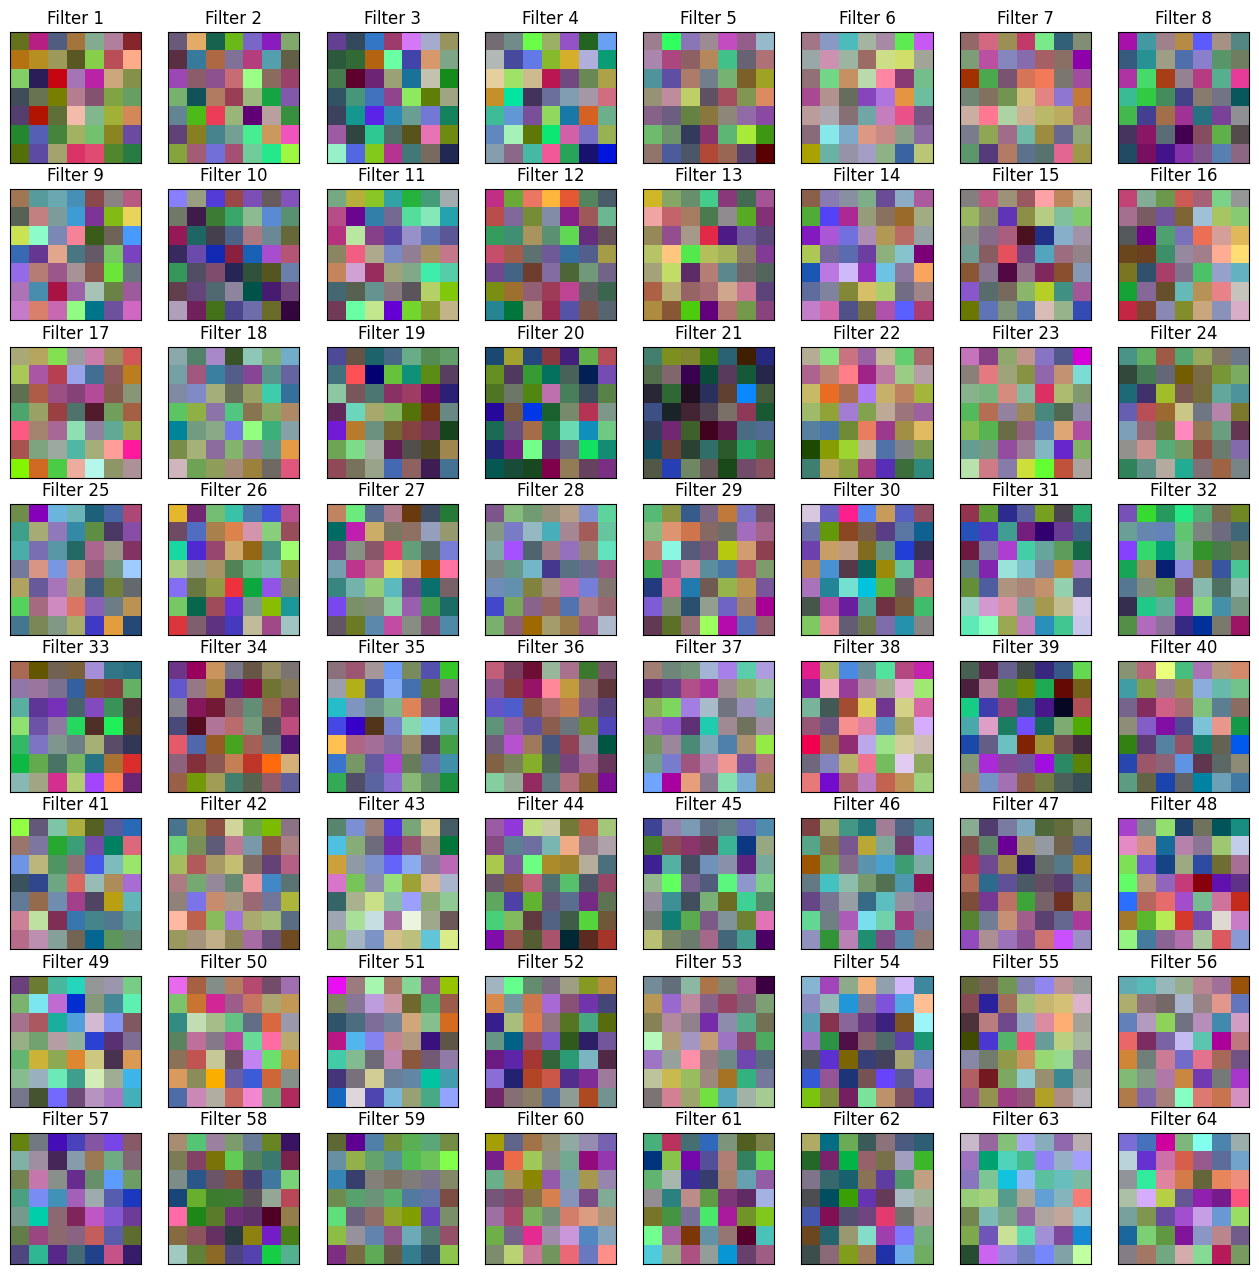

In [101]:
u7.set_seed(100)
weights_after_training = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 4.5. [5 Points]</b>
    <ul>
        <li>Compare the filters plotted before and after training. Do you see any difference? Did the filters change visibly during training?</li>
    </ul>
</div>

Still see no difference.

<div class="alert alert-warning">
    <b>Important:</b> Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.
</div>

In [102]:
u7.set_seed(100)
(weights_before_training - weights_after_training).abs().sum().item()

74.29014587402344

<h2>Exercise 5</h2>

Magic vs. you!

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Using <code>u7.perform_magic()</code>, calculate the error rate on the dataset specified in the beginning of the notebook (use the same path).</li>
        <li>Use a validation size of 20% and let it run for 2 iterations/epochs. All other settings should use the default values.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.perform_magic()</code>.</li>
    </ul>
</div>

In [107]:
u7.set_seed(42)
result = u7.perform_magic(dataset_path, iterations = 2,valid_size=0.2)

epoch,train_loss,valid_loss,error_rate,time
0,0.549077,0.398774,0.128000,00:04
1,0.317449,0.325204,0.104000,00:03


<div class="alert alert-warning">
    <b>Exercise 5.2. [30 Points]</b>
    <ul>
        <li>Now it's your time! Can you get the same or a lower error rate on the validation set than the magic from above?</li>
        <li>Use the same validation size of 20% when manually loading the dataset with <code>u7.load_image_dataset()</code>. All other settings are completely up to you!</li>
        <li><b>Important:</b> Set the seed to 100 before all following calls:
            <ul>
                <li><code>u7.load_image_dataset()</code></li>
                <li><code>u7.create_cnn()</code> (if you want to use this utility function, you can also set up your own architecture, but make sure to set the seed before that, too)</li>
                <li><code>u7.run_gradient_descent()</code></li>
            </ul>
        </li>
        <li>Note: In the unlikely case that <code>u7.perform_magic()</code> from above has an error rate of 0, try to get as close as possible to this result (within about 5% error rate).</li>
    </ul>
</div>

In [111]:
u7.set_seed(100)


dataset = u7.load_image_dataset(
    dataset_path,
    valid_size=0.2,  # keep 20% for validation
    batch_size=32,   # reduce if you run out of RAM
    augment=True     # whether to use augmentation
)

model = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=True,   # whether to use batch normalization
    dropout=0.5,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=True,   # whether to use residual connections
    pretrained=False   # whether to use pretrained weights
)
loss = torch.nn.functional.cross_entropy

u7.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=16,         # number of epochs
    learning_rate=0.001,  # base learning rate
    momentum=0.9,         # base momentum
    lr_schedule=None,     # try "linear", "onecycle", "steps"
    plot_curves=False
);

result = u7.perform_magic(dataset_path, iterations = 2,valid_size=0.2)

  0%|          | 0/501 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.767228 and validation loss: 0.700853
Epoch  2 finished with training loss: 0.719890 and validation loss: 0.670343
Epoch  3 finished with training loss: 0.670068 and validation loss: 0.707504
Epoch  4 finished with training loss: 0.625729 and validation loss: 1.045088
Epoch  5 finished with training loss: 0.598022 and validation loss: 1.444214
Epoch  6 finished with training loss: 0.545378 and validation loss: 1.196599
Epoch  7 finished with training loss: 0.508806 and validation loss: 1.620410
Epoch  8 finished with training loss: 0.517939 and validation loss: 1.646157
Epoch  9 finished with training loss: 0.460367 and validation loss: 2.332150
Epoch 10 finished with training loss: 0.446835 and validation loss: 2.531127
Epoch 11 finished with training loss: 0.411010 and validation loss: 2.403072
Epoch 12 finished with training loss: 0.382985 and validation loss: 2.230328
Epoch 13 finished with training loss: 0.422289 and validation loss: 2.149817

epoch,train_loss,valid_loss,error_rate,time
0,0.581660,0.260552,0.088000,00:03
1,0.321515,0.235107,0.064000,00:03
